In [6]:
!ls /data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88*Th2*.featurecounts.counts.txt


/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep1.star2.featurecounts.counts.txt
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep2.star2.featurecounts.c

In [34]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq

In [1]:
import re
import pandas as pd


comp_files = {
    'Th1.Bulk.0hr': [
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt'],
    
    'Th1.Bulk.2hr': [
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_2hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_2hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_2hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th1.Bulk.16hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_16hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_16hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_16hr_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th1.Bulk.24hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_24hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_24hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_24hr_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th1.Bulk.48hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_48hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_48hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_48hr_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt'
    ], 
    
    'Th1.Sorted.72hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_72hr-Sorted_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_72hr-Sorted_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS191_Th1_72hr-Sorted_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep4.star2.featurecounts.counts.txt'
    ],
    
   'Th2.Bulk.0hr': [
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt'],
    
    'Th2.Bulk.2hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep4.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.16hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_16hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_16hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_16hr_rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_16hr_rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.24hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_24hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_24hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_24hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_24hr_rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.48hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_48hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_48hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_48hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_48hr_rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt'
    ], 
    
    'Th2.Sorted.72hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_72hr-Sort_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_72hr-Sort_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_72hr-Sort_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_72hr-Sort_rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep4.star2.featurecounts.counts.txt'
    ]
}

def clean_count_column(s):
    items = ['Sort','sorted', 'Sorted']
    name = '.'.join(s.split('/')[-1].split('.')[:3])
    if name.startswith('KS'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('_','.').replace('72hr-Sorted','Sorted.72hr').replace('72hr-Sort','Sorted.72hr').split('.')[1:5])
        else:
            return '.'.join(s.split('/')[-1].replace('_','.').replace('Th2.','Th2.Bulk.').replace('Th1.','Th1.Bulk.').split('.')[1:5])
        
    if name.startswith('mm'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated_sorted','.Sorted').replace('h.','hr.').split('.')[:4])
        else:
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated','.Bulk').replace('h.','hr.').split('.')[:4])
        
    else:
        if any(i in s for i in items):
            split_words = '.'.join(s.split('.')[1:3])
            rev_words = '.'.join(list(reversed(s.split('.')[1:3])))
            return '.'.join(s.split('/')[-1].replace(split_words, rev_words).split('.')[:4])
        else:
            s = re.sub('17.', '17.Bulk.', s)
            return '.'.join(s.split('/')[-1].split('.')[:4])
        
        
for comp, files in comp_files.items():
    df = None
    for f in files:
        df_tmp = pd.read_csv(f, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_count_column(f)]
        if df is None:
            df = df_tmp.loc[:, ['Chr', 'Start', 'End'] + [df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')

    df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/%s.counts.txt' % comp, sep='\t')
    

In [1]:
!head /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th2.Bulk.24hr-mmTh0.Bulk.24hr.counts.txt

head: cannot open ‘/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th2.Bulk.24hr-mmTh0.Bulk.24hr.counts.txt’ for reading: No such file or directory


In [3]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -pall \
    --array=0-11 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Keith/Th1/logs/deseq.%a.out \
    <<'EOF'
#!/bin/bash
COMPARISONS=( \
#      Th1.Bulk.0hr-mmTh0.Bulk.00hr \ 
#      Th1.Bulk.2hr-mmTh0.Bulk.02hr \
#      Th1.Bulk.16hr-mmTh0.Bulk.16hr \
#      Th1.Bulk.24hr-mmTh0.Bulk.24hr \ 
#      Th1.Bulk.48hr-mmTh0.Bulk.48hr \
#      Th1.Sorted.72hr-mmTh0.Sorted.72hr \
#      Th2.Bulk.0hr-mmTh0.Bulk.00hr \ 
#      Th2.Bulk.2hr-mmTh0.Bulk.02hr \
     Th2.Bulk.16hr-mmTh0.Bulk.16hr \
     Th2.Bulk.24hr-mmTh0.Bulk.24hr \ 
     Th2.Bulk.48hr-mmTh0.Bulk.48hr \
     Th2.Sorted.72hr-mmTh0.Sorted.72hr 
)
COMPARISON=${COMPARISONS[${SLURM_ARRAY_TASK_ID}]}
TREAT=$(echo $COMPARISON | cut -d"-" -f1)
CONTROL=$(echo $COMPARISON | cut -d"-" -f2)
FACTOR=$(echo $COMPARISON | cut -d"-" -f1)
Rscript /data/reddylab/Revathy/scripts/rnaseq_dge.deseq2_v2.R \
    --treatments $(echo ${TREAT}.rep{1,2,3,4}) \
    --controls $(echo ${CONTROL}.rep{1,2,3,4}) \
    --lfcShrink ashr \
    --counts-skip-ncols 3 \
    --outdir /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/ \
    --counts /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/${FACTOR}.counts.txt
    
EOF


Submitted batch job 26862783


In [4]:
%%bash
FDR=0.05
COMPARISONS=( \ 
     Th1.Bulk.0hr_vs_mmTh0.Bulk.00hr \ 
     Th1.Bulk.2hr_vs_mmTh0.Bulk.02hr \
     Th1.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     Th1.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     Th1.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr \
     Th2.Bulk.0hr_vs_mmTh0.Bulk.00hr \ 
     Th2.Bulk.2hr_vs_mmTh0.Bulk.02hr \
     Th2.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     Th2.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     Th2.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr 
)
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.txt |  cut -d. -f1 > ${COMP}.expressed_genes.txt 
    
    # Save significant upreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3>0)){print $1}}' |  cut -d. -f1 > ${COMP}.upreg_genes.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3<0)){print $1}}' |  cut -d. -f1 > ${COMP}.downreg_genes.txt 

done



In [5]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

In [6]:
%%bash
FDR=0.05
COMPARISONS=( \
     Th1.Bulk.0hr_vs_mmTh0.Bulk.00hr \ 
     Th1.Bulk.2hr_vs_mmTh0.Bulk.02hr \
     Th1.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     Th1.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     Th1.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr \
     Th2.Bulk.0hr_vs_mmTh0.Bulk.00hr \ 
     Th2.Bulk.2hr_vs_mmTh0.Bulk.02hr \
     Th2.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     Th2.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     Th2.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr 
)
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.with_genes.txt |  awk '{print $NF}' > ${COMP}.expressed_genes.symbols.txt 

    # Save significant upreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3>0)){print $NF}}' > ${COMP}.upreg_genes.symbols.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3<0)){print $NF}}' > ${COMP}.downreg_genes.symbols.txt 

done



In [49]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/plots/

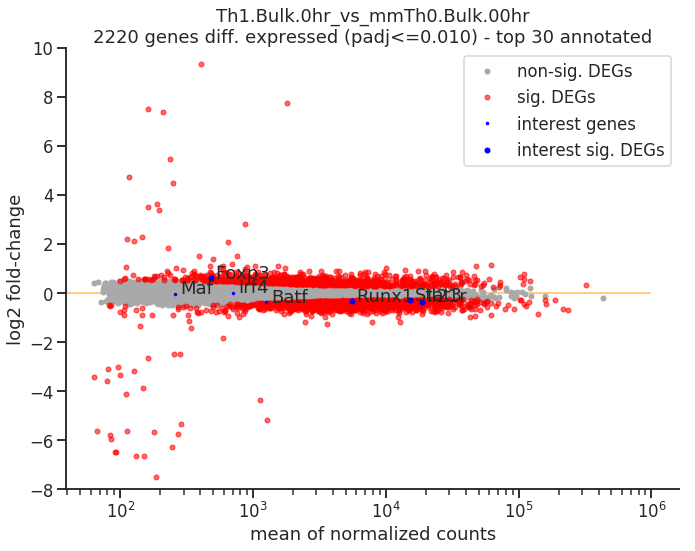

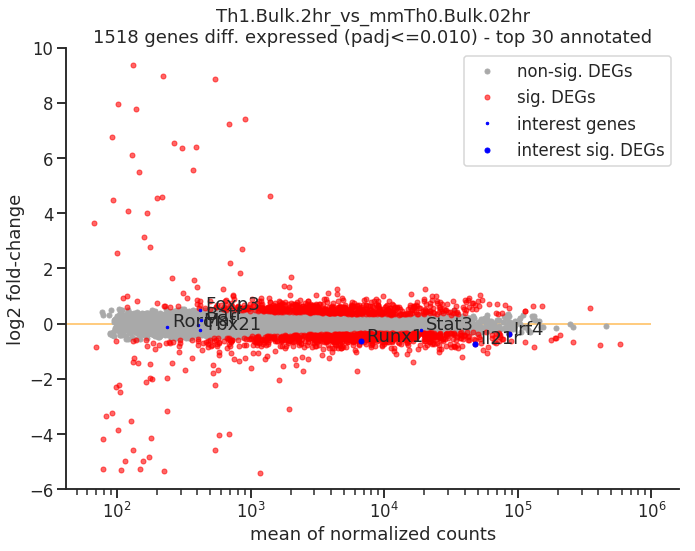

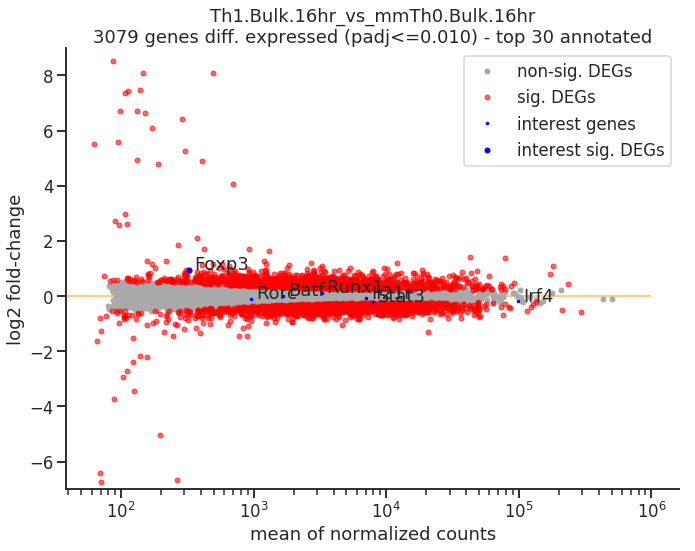

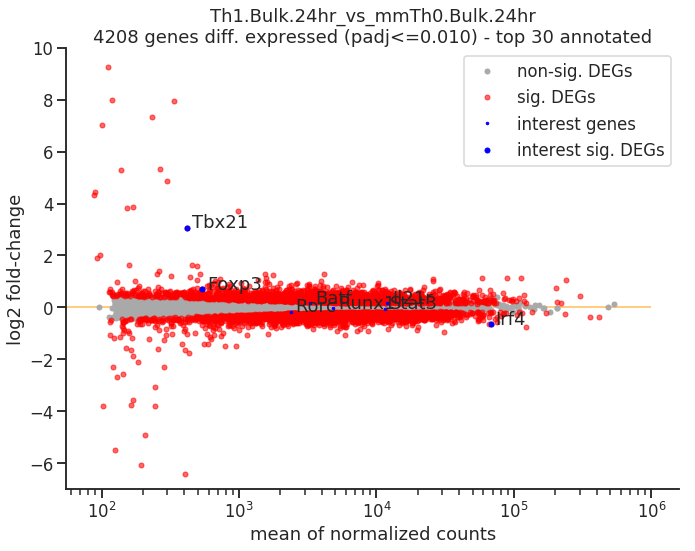

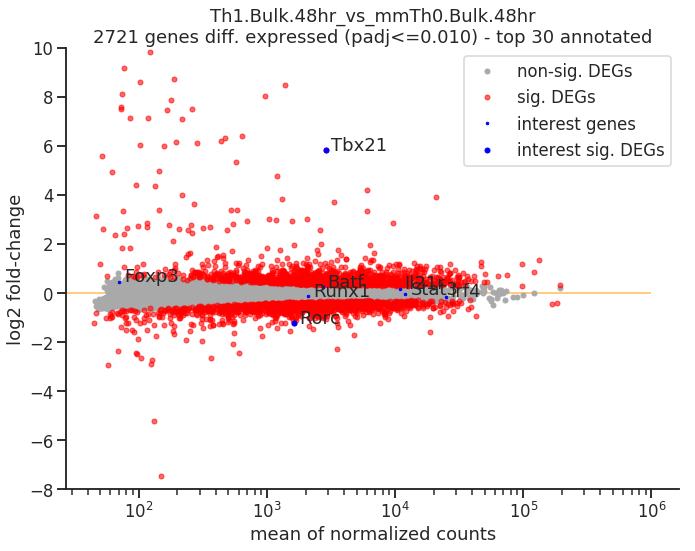

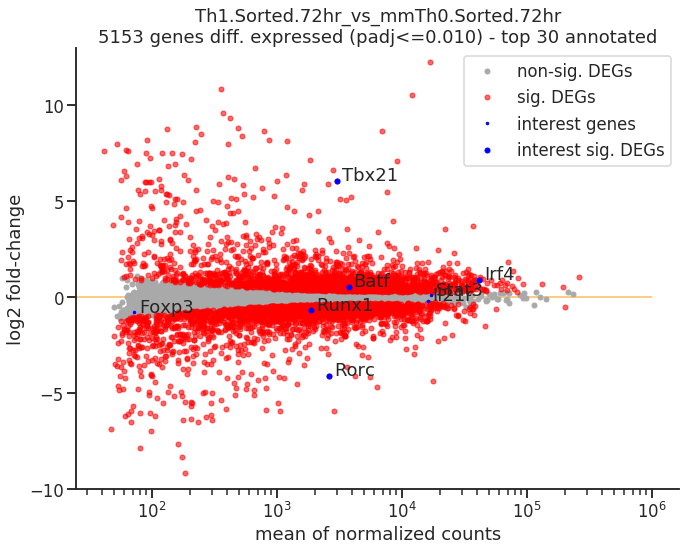

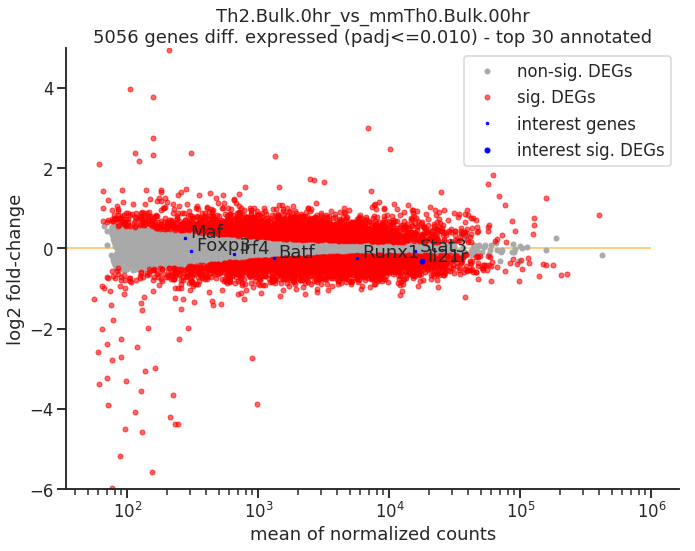

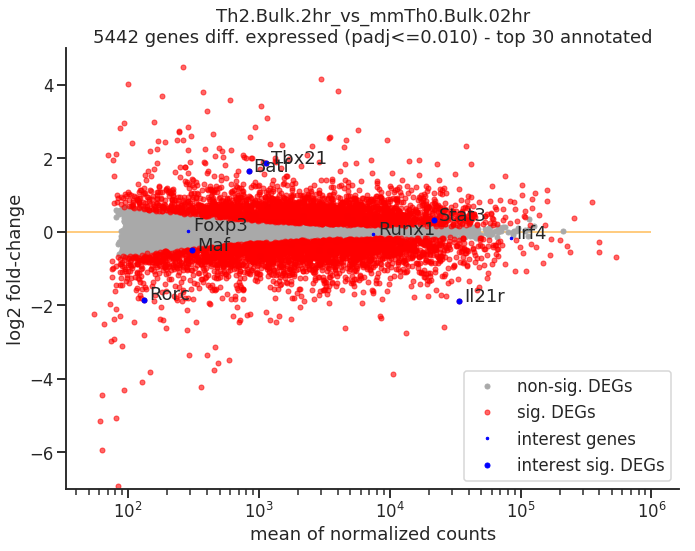

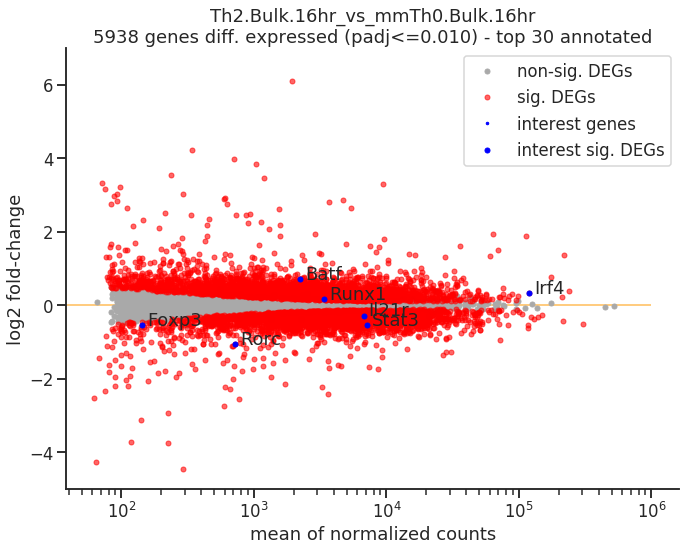

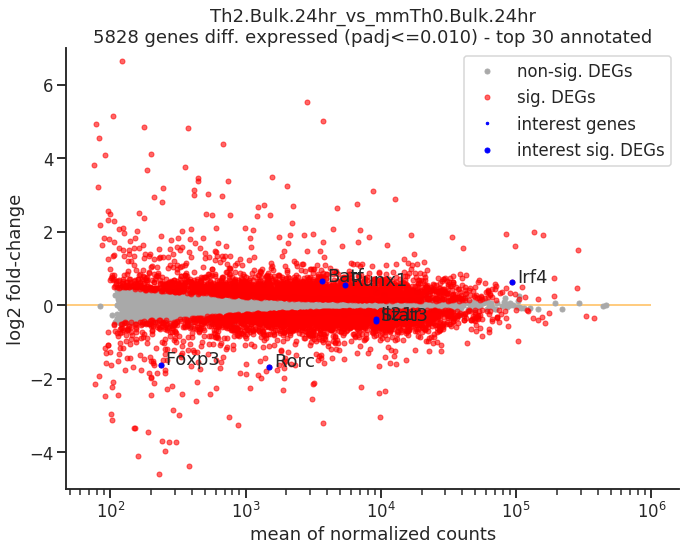

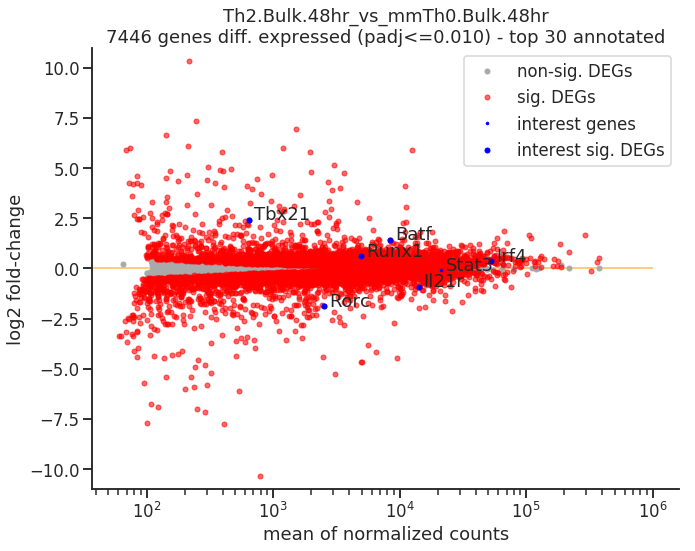

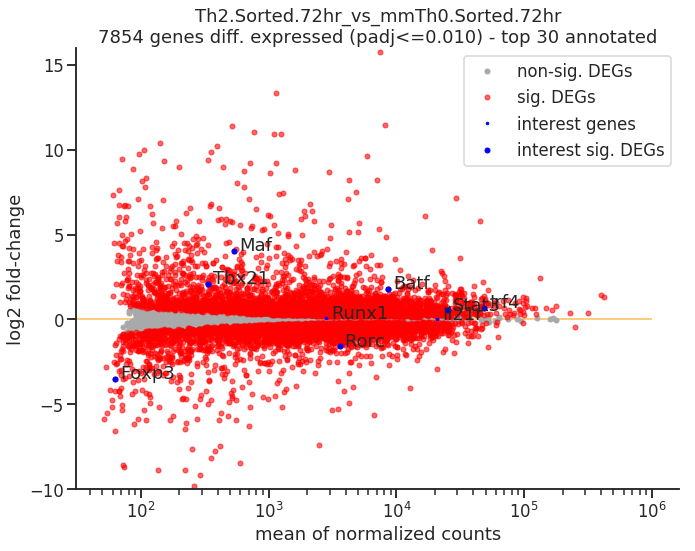

In [8]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
comparisons = [
     'Th1.Bulk.0hr_vs_mmTh0.Bulk.00hr',  
     'Th1.Bulk.2hr_vs_mmTh0.Bulk.02hr',
     'Th1.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th1.Bulk.24hr_vs_mmTh0.Bulk.24hr', 
     'Th1.Bulk.48hr_vs_mmTh0.Bulk.48hr', 
     'Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr',
     'Th2.Bulk.0hr_vs_mmTh0.Bulk.00hr', 
     'Th2.Bulk.2hr_vs_mmTh0.Bulk.02hr', 
     'Th2.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     'Th2.Bulk.24hr_vs_mmTh0.Bulk.24hr', 
     'Th2.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr' 
]

data_dir = '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/plots/degs.%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/plots/degs.%s.with_genes.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    plt.show()
    

## DESeq for Th1 and Th2 taking reference as Th1 and Th2 00hr respectively

In [1]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/zero_hr

In [ ]:
import re
import pandas as pd


comp_files = {
    'Th1.Bulk.2hr': [
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_2hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_2hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_2hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt'
    ],
    
    'Th1.Bulk.16hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_16hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_16hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_16hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt',
    ],
    
    'Th1.Bulk.24hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_24hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_24hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_24hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt',
    ],
    
    'Th1.Bulk.48hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_48hr_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_48hr_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_48hr_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt',
    ], 
    
    'Th1.Sorted.72hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_72hr-Sorted_rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_72hr-Sorted_rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_72hr-Sorted_rep3.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.featurecounts.counts.txt',
   '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.featurecounts.counts.txt',
    ],
    
    'Th2.Bulk.2hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_2hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_2hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_2hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_2hr_rep4.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.16hr': [
  '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_16hr_rep4.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.24hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_24hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_24hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_24hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_24hr_rep4.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th2.Bulk.48hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_48hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_48hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_48hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_48hr_rep4.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt'
    ], 
    
    'Th2.Sorted.72hr': [
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_72hr-Sort_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_72hr-Sort_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_72hr-Sort_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_72hr-Sort_rep4.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.featurecounts.counts.txt'
    ]
}

def clean_count_column(s):
    items = ['Sort','sorted', 'Sorted']
    name = '.'.join(s.split('/')[-1].split('.')[:3])
    if name.startswith('KS'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('_','.').replace('72hr-Sorted','Sorted.72hr').replace('72hr-Sort','Sorted.72hr').split('.')[1:5])
        else:
            return '.'.join(s.split('/')[-1].replace('_','.').replace('Th2.','Th2.Bulk.').replace('Th1.','Th1.Bulk.').split('.')[1:5])
        
    if name.startswith('mm'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated_sorted','.Sorted').replace('h.','hr.').split('.')[:4])
        else:
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated','.Bulk').replace('h.','hr.').split('.')[:4])
        
    else:
        if any(i in s for i in items):
            split_words = '.'.join(s.split('.')[1:3])
            rev_words = '.'.join(list(reversed(s.split('.')[1:3])))
            return '.'.join(s.split('/')[-1].replace(split_words, rev_words).split('.')[:4])
        else:
            s = re.sub('17.', '17.Bulk.', s)
            return '.'.join(s.split('/')[-1].split('.')[:4])
        
        
for comp, files in comp_files.items():
    df = None
    for f in files:
        df_tmp = pd.read_csv(f, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_count_column(f)]
        if df is None:
            df = df_tmp.loc[:, ['Chr', 'Start', 'End'] + [df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')

    df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/zero_hr/%s.counts.txt' % comp, sep='\t')
    

In [10]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -pall \
    --array=0-1 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Keith/Th1/logs/deseq_zero.%a.out \
    <<'EOF'
#!/bin/bash
COMPARISONS=( \
#      Th1.Bulk.2hr-Th1.Bulk.0hr \
#      Th1.Bulk.16hr-Th1.Bulk.0hr \
#      Th1.Bulk.24hr-Th1.Bulk.0hr \ 
#      Th1.Bulk.48hr-Th1.Bulk.0hr \
#      Th1.Sorted.72hr-Th1.Bulk.0hr \
#      Th2.Bulk.2hr-Th2.Bulk.0hr \
#      Th2.Bulk.16hr-Th2.Bulk.0hr \
#      Th2.Bulk.24hr-Th2.Bulk.0hr \ 
     Th2.Bulk.48hr-Th2.Bulk.0hr \
     Th2.Sorted.72hr-Th2.Bulk.0hr
)
COMPARISON=${COMPARISONS[${SLURM_ARRAY_TASK_ID}]}
TREAT=$(echo $COMPARISON | cut -d"-" -f1)
CONTROL=$(echo $COMPARISON | cut -d"-" -f2)
FACTOR=$(echo $COMPARISON | cut -d"-" -f1)
Rscript /data/reddylab/Revathy/scripts/rnaseq_dge.deseq2_v2.R \
    --treatments $(echo ${TREAT}.rep{1,2,3,4}) \
    --controls $(echo ${CONTROL}.rep{1,2,3,4}) \
    --lfcShrink ashr \
    --counts-skip-ncols 3 \
    --outdir /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr \
    --counts /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/zero_hr/${FACTOR}.counts.txt
    
EOF


Submitted batch job 26859456


In [11]:
%%bash
FDR=0.05
COMPARISONS=( \ 
#      Th1.Bulk.2hr_vs_Th1.Bulk.0hr \
#      Th1.Bulk.16hr_vs_Th1.Bulk.0hr \
#      Th1.Bulk.24hr_vs_Th1.Bulk.0hr \ 
#      Th1.Bulk.48hr_vs_Th1.Bulk.0hr \
#      Th1.Sorted.72hr_vs_Th1.Bulk.0hr \
#      Th2.Bulk.2hr_vs_Th2.Bulk.0hr \
#      Th2.Bulk.16hr_vs_Th2.Bulk.0hr \
#      Th2.Bulk.24hr_vs_Th2.Bulk.0hr \ 
     Th2.Bulk.48hr_vs_Th2.Bulk.0hr \
     Th2.Sorted.72hr_vs_Th2.Bulk.0hr
)
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.txt |  cut -d. -f1 > ${COMP}.expressed_genes.txt 
    
    # Save significant upreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3>0)){print $1}}' |  cut -d. -f1 > ${COMP}.upreg_genes.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3<0)){print $1}}' |  cut -d. -f1 > ${COMP}.downreg_genes.txt 

done



In [12]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

In [13]:
%%bash
FDR=0.05
COMPARISONS=( \
#      Th1.Bulk.2hr_vs_Th1.Bulk.0hr \
#      Th1.Bulk.16hr_vs_Th1.Bulk.0hr \
#      Th1.Bulk.24hr_vs_Th1.Bulk.0hr \ 
#      Th1.Bulk.48hr_vs_Th1.Bulk.0hr \
#      Th1.Sorted.72hr_vs_Th1.Bulk.0hr \
#      Th2.Bulk.2hr_vs_Th2.Bulk.0hr \
#      Th2.Bulk.16hr_vs_Th2.Bulk.0hr \
#      Th2.Bulk.24hr_vs_Th2.Bulk.0hr \ 
     Th2.Bulk.48hr_vs_Th2.Bulk.0hr \
     Th2.Sorted.72hr_vs_Th2.Bulk.0hr
)
cd /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.with_genes.txt |  awk '{print $NF}' > ${COMP}.expressed_genes.symbols.txt 

    # Save significant upreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3>0)){print $NF}}' > ${COMP}.upreg_genes.symbols.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3<0)){print $NF}}' > ${COMP}.downreg_genes.symbols.txt 

done



In [8]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr/plots

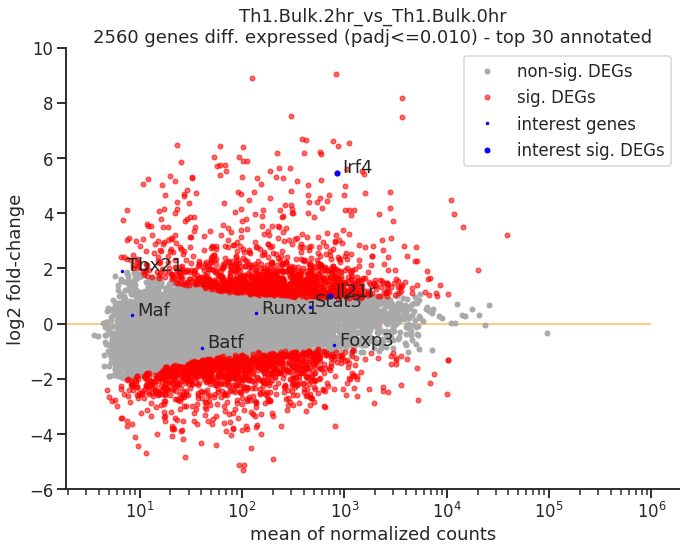

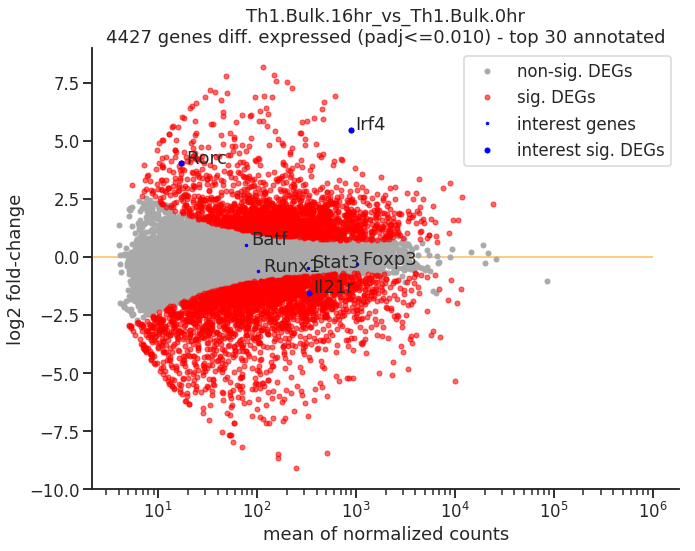

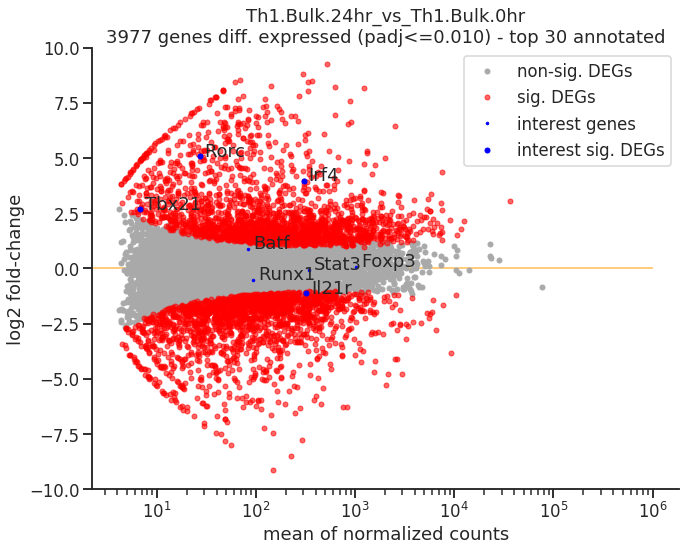

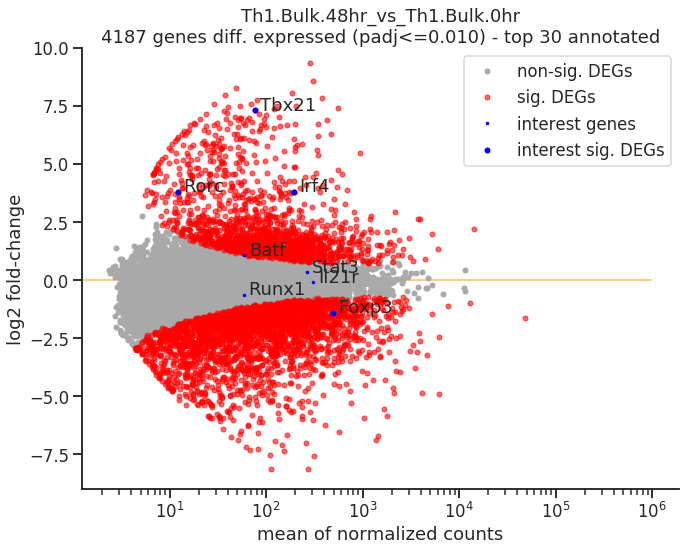

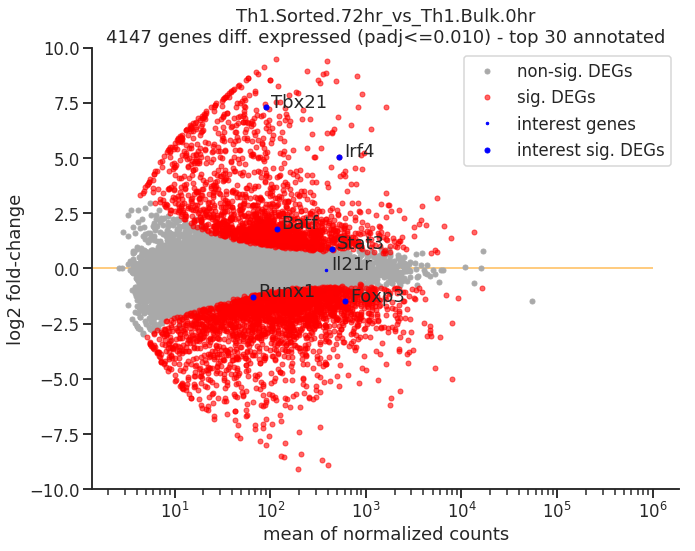

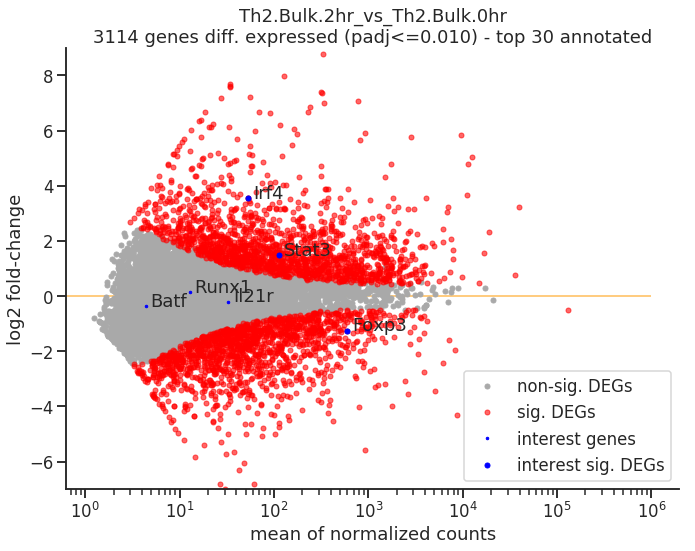

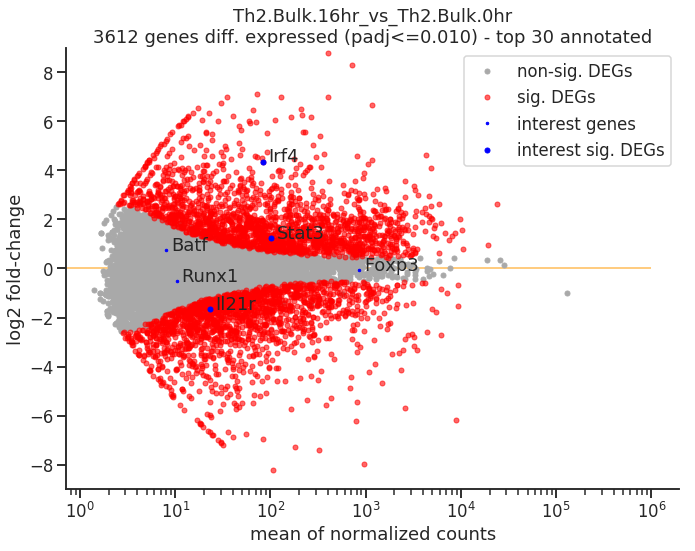

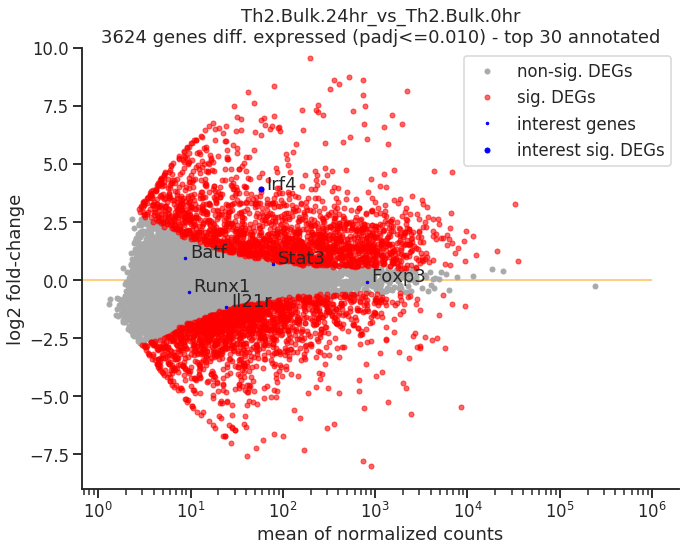

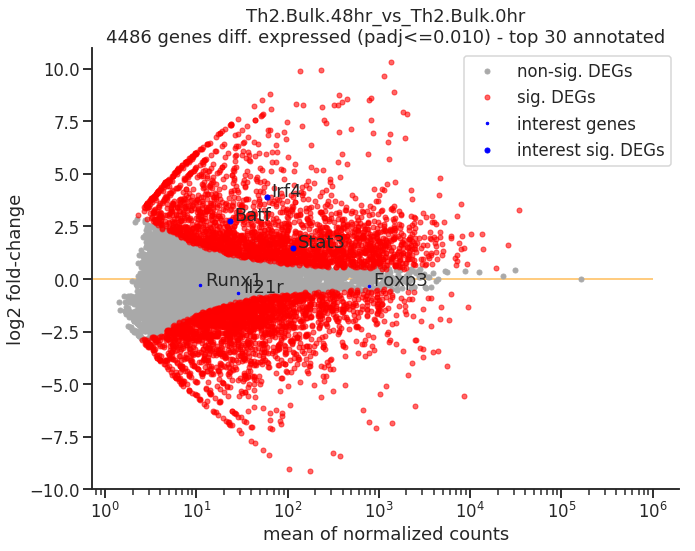

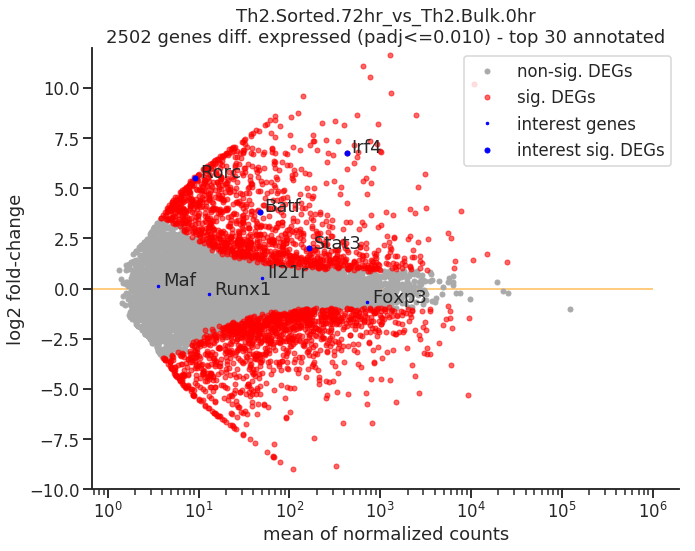

In [14]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
comparisons = [
     'Th1.Bulk.2hr_vs_Th1.Bulk.0hr', 
     'Th1.Bulk.16hr_vs_Th1.Bulk.0hr',
     'Th1.Bulk.24hr_vs_Th1.Bulk.0hr',
     'Th1.Bulk.48hr_vs_Th1.Bulk.0hr',
     'Th1.Sorted.72hr_vs_Th1.Bulk.0hr',
     'Th2.Bulk.2hr_vs_Th2.Bulk.0hr',
     'Th2.Bulk.16hr_vs_Th2.Bulk.0hr', 
     'Th2.Bulk.24hr_vs_Th2.Bulk.0hr',  
     'Th2.Bulk.48hr_vs_Th2.Bulk.0hr',
     'Th2.Sorted.72hr_vs_Th2.Bulk.0hr'
]

data_dir = '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr/plots/degs.%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr/plots/degs.%s.with_genes.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/deseq/zero_hr/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    plt.show()
    
    # print table of values 
#     print ("======", comparison, "======")
#     display(df_annotate) 
    
